Artificial neural networks (10 marks)

In [2]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import time

In [3]:
# Define function to plot training and validation learning curves

def learning_curves(mod, X_train, y_train , cv=5):
    N, train_score, val_score = learning_curve(mod, X_train, y_train, cv=cv)
    plt.plot(N, train_score.mean(axis=1), label='Train')
    plt.plot(N, val_score.mean(axis=1), label='Validation')
    plt.xlabel('train size')
    plt.legend()

In [4]:
# Load the fashion-MNIST dataset

import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [5]:
# Train a Neural Net

mlp = MLPClassifier()
start = time.time()
mlp.fit(X_train, y_train)
end = time.time()
print("Training accuracy:", accuracy_score(y_train, mlp.predict(X_train)))
print("Test set accuracy:", accuracy_score(y_test, mlp.predict(X_test)))
print(f"Training time: {end - start}s")

Training accuracy: 0.995
Test set accuracy: 0.8786
Training time: 100.71097302436829s


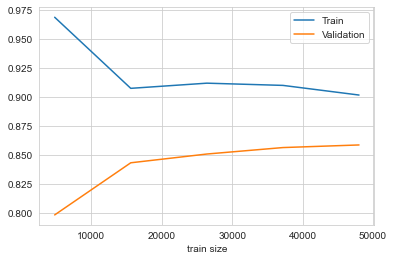

In [124]:
# Plot learning curves

N, train_score, val_score = learning_curve(mlp, X_train, y_train)
plt.plot(N, train_score.mean(axis=1), label='Train')
plt.plot(N, val_score.mean(axis=1), label='Validation')    
plt.xlabel('train size')
plt.legend()

In [56]:
# Compare different values of alpha

alphas = [0, 0.00001,0.0001,0.001,0.01, 0.1, 1, 10]
train_accuracies = []
test_accuracies = []
for alpha in alphas:
    mlp = MLPClassifier(alpha=alpha)
    mlp.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, mlp.predict(X_train))
    test_acc = accuracy_score(y_test, mlp.predict(X_test))
    print("Training accuracy for alpha =", alpha, ":", train_acc)
    print("Test accuracy for alpha =", alpha, ":", test_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

Training accuracy for alpha = 0 : 0.89995
Test accuracy for alpha = 0 : 0.8461
Training accuracy for alpha = 1e-05 : 0.8940166666666667
Test accuracy for alpha = 1e-05 : 0.8444
Training accuracy for alpha = 0.0001 : 0.8952166666666667
Test accuracy for alpha = 0.0001 : 0.843
Training accuracy for alpha = 0.001 : 0.8948666666666667
Test accuracy for alpha = 0.001 : 0.8479
Training accuracy for alpha = 0.01 : 0.88725
Test accuracy for alpha = 0.01 : 0.8487
Training accuracy for alpha = 0.1 : 0.8883166666666666
Test accuracy for alpha = 0.1 : 0.8511
Training accuracy for alpha = 1 : 0.8766666666666667
Test accuracy for alpha = 1 : 0.8505
Training accuracy for alpha = 10 : 0.8549166666666667
Test accuracy for alpha = 10 : 0.8321


[0.89995, 0.8940166666666667, 0.8952166666666667, 0.8948666666666667, 0.88725, 0.8883166666666666, 0.8766666666666667, 0.8549166666666667]
[0.8461, 0.8444, 0.843, 0.8479, 0.8487, 0.8511, 0.8505, 0.8321]


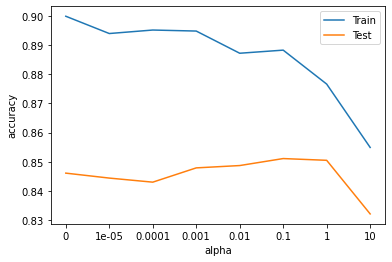

In [57]:
print(train_accuracies)
print(test_accuracies)

x = range(len(alphas))
plt.plot(x, train_accuracies, label='Train')
plt.plot(x, test_accuracies, label='Test')

plt.xticks(x, alphas)
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()

In [63]:
max(test_accuracies[0:len(alphas)-1]) - min(test_accuracies[0:len(alphas)-1])

0.008099999999999996

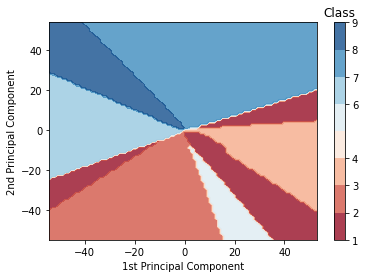

In [13]:
# Plot decision boundaries

pca = PCA(n_components=2)
Z = pca.fit_transform(X_train)
V = pca.components_
Z_x = Z[0]
Z_y = Z[1]
std_x = np.std(Z_x)
std_y = np.std(Z_y)
x_min, x_max = -5*std_x, 5*std_x
y_min, y_max = -5*std_y, 5*std_y
x_step = std_x/10
y_step = std_y/10
xx, yy = np.meshgrid(np.arange(x_min, x_max, x_step), np.arange(y_min, y_max, y_step))
z = np.c_[xx.ravel(), yy.ravel()]
x = np.dot(z,V)
predictions = mlp.predict(x)
predictions = predictions.reshape(xx.shape)

cm_bright = ListedColormap(['#FF0000', '#0000FF'])

contour = plt.contourf(xx, yy, predictions, cmap=plt.cm.RdBu, alpha=0.8)
clb = plt.colorbar(contour, boundaries=list(np.unique(predictions)), ticks=list(np.unique(predictions)),spacing='proportional')
clb.ax.set_title('Class')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.show()

Support vector machines (15 marks)

In [7]:
svm = SVC()
start = time.time()
svm.fit(X_train, y_train)
end = time.time()
print(f'SVM classifier train accuracy: {svm.score(X_train, y_train)}')
print(f'SVM classifier test accuracy: {svm.score(X_test, y_test)}')
print(f"Training time: {end - start}s")

SVM classifier train accuracy: 0.9237
SVM classifier test accuracy: 0.8836
Training time: 600.1504299640656s


In [ ]:
learning_curves(svm, X_train, y_train)

In [14]:
# Compare different types of kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} default=’rbf’

kernels = ["linear", "poly", "rbf", "sigmoid"]
train_accuracies = []
test_accuracies = []
for kernel in kernels:
    svm = SVC(kernel=kernel, max_iter=1000)
    svm.fit(scaled_x_train, y_train)
    train_acc = accuracy_score(y_train, svm.predict(X_train))
    test_acc = accuracy_score(y_test, svm.predict(X_test))
    print("Training accuracy for", kernel, ":", train_acc)
    print("Test accuracy for", kernel, ":", test_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

/Users/lucy/opt/anaconda3/envs/ML_labs/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training accuracy for linear : 0.6186833333333334
Test accuracy for linear : 0.5965


/Users/lucy/opt/anaconda3/envs/ML_labs/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training accuracy for poly : 0.6362666666666666
Test accuracy for poly : 0.6267


/Users/lucy/opt/anaconda3/envs/ML_labs/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training accuracy for rbf : 0.87415
Test accuracy for rbf : 0.8431


/Users/lucy/opt/anaconda3/envs/ML_labs/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training accuracy for sigmoid : 0.6952666666666667
Test accuracy for sigmoid : 0.6857


[0.6186833333333334, 0.6362666666666666, 0.87415, 0.6952666666666667]
[0.5965, 0.6267, 0.8431, 0.6857]


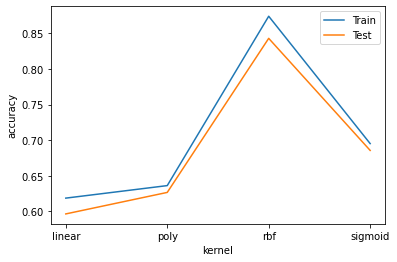

In [15]:
print(train_accuracies)
print(test_accuracies)

In [ ]:
# Plot result of changing gamma in RBF kernel

gammas = [0.001, 0.01, 0.1, 1, 10]
train_accuracies = []
test_accuracies = []
for gamma in gammas:
    svm = SVC(gamma=gamma, max_iter=1000)
    svm.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, svm.predict(X_train))
    test_acc = accuracy_score(y_test, svm.predict(X_test))
    print("Training accuracy for", gamma, ":", train_acc)
    print("Test accuracy for", gamma, ":", test_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

In [ ]:
print(train_accuracies)
print(test_accuracies)

x = range(len(gammas))
plt.plot(x, train_accuracies, label='Train')
plt.plot(x, test_accuracies, label='Test')

plt.xticks(x, gammas)
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.legend()

[]

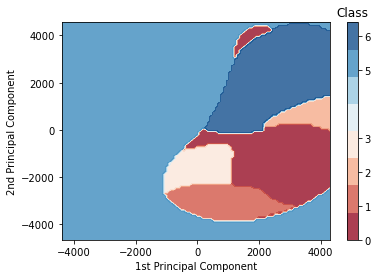

In [10]:
# Plot decision boundaries

pca = PCA(n_components=2)
Z = pca.fit_transform(X_train)
V = pca.components_
Z_x = Z[0]
Z_y = Z[1]
std_x = np.std(Z_x)
std_y = np.std(Z_y)
x_min, x_max = -5*std_x, 5*std_x
y_min, y_max = -5*std_y, 5*std_y
x_step = std_x/10
y_step = std_y/10
xx, yy = np.meshgrid(np.arange(x_min, x_max, x_step), np.arange(y_min, y_max, y_step))
z = np.c_[xx.ravel(), yy.ravel()]
x = np.dot(z,V)
predictions = svm.predict(x)
predictions = predictions.reshape(xx.shape)

cm_bright = ListedColormap(['#FF0000', '#0000FF'])

contour = plt.contourf(xx, yy, predictions, cmap=plt.cm.RdBu, alpha=0.8)
clb = plt.colorbar(contour, boundaries=list(np.unique(predictions)), ticks=list(np.unique(predictions)),spacing='proportional')
clb.ax.set_title('Class')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.show()